# **CASE: DESEMPENHO PRÉ-VESTIBULAR**

---

### Instalação de bibliotecas

In [ ]:
# As bibliotecas utilizadas neste notebook já vêm pré-instaladas no Google Colab

### Carregamento de bibliotecas

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA   # Redução de dimensões

### Leitura da base de dados

In [2]:
dados_pre_vestibular = pd.read_table("../Dados/Desempenho_Pre_Vestibular.txt", sep = "\t")

### Visualização da base de dados

In [3]:
display(dados_pre_vestibular)

,ALUNO,MEDIA_PORTUGUES,MEDIA_MATEMATICA,MEDIA_QUIMICA,MEDIA_BIOLOGIA,MEDIA_FISICA,MEDIA_GEOGRAFIA,MEDIA_HISTORIA
0,1,7.3,8.2,8.3,8.2,8.8,8.5,8.0
1,2,6.3,6.8,7.8,6.5,6.2,7.8,7.0
2,3,10.0,8.7,7.3,8.4,7.8,8.8,7.7
3,4,7.8,7.9,7.7,6.9,7.2,8.4,7.4
4,5,6.0,8.4,7.8,7.6,9.0,5.1,6.3
...,...,...,...,...,...,...,...,...
195,196,8.9,8.5,6.9,8.9,8.5,9.3,8.4
196,197,8.1,8.1,7.0,7.8,6.9,6.5,8.5
197,198,9.5,8.0,8.0,7.8,8.4,7.9,7.1
198,199,8.0,7.7,7.9,7.3,7.2,7.6,8.2


### Análise exploratória

In [4]:
# Medidas resumo
dados_pre_vestibular.drop(columns = ['ALUNO']).describe()

,MEDIA_PORTUGUES,MEDIA_MATEMATICA,MEDIA_QUIMICA,MEDIA_BIOLOGIA,MEDIA_FISICA,MEDIA_GEOGRAFIA,MEDIA_HISTORIA
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,7.606000,7.457000,7.411500,7.535500,7.477500,7.635500,7.599500
std,1.031057,0.977254,0.878108,0.939737,0.942915,1.019207,0.979462
min,5.100000,4.500000,4.800000,4.500000,4.700000,3.900000,4.800000
25%,6.900000,6.800000,6.800000,6.900000,6.900000,6.900000,7.000000
50%,7.650000,7.500000,7.400000,7.600000,7.500000,7.650000,7.500000
75%,8.400000,8.200000,8.000000,8.200000,8.125000,8.300000,8.325000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


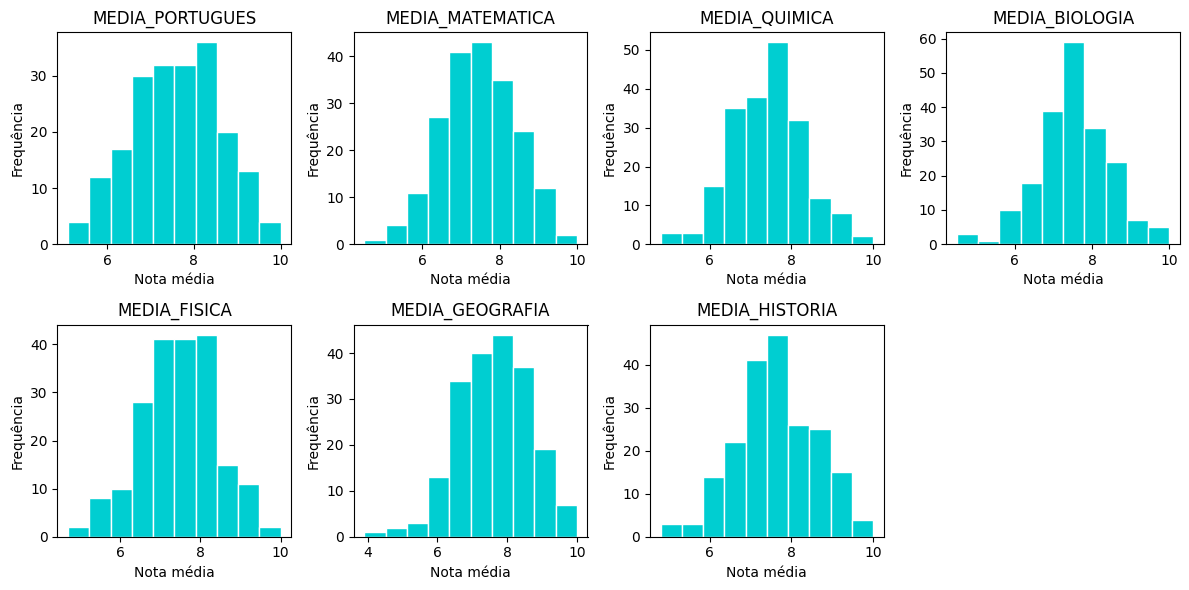

In [5]:
# Histogramas
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (12, 6))

variaveis = dados_pre_vestibular.columns[1:]

for ax, variavel in zip(axes.flat, variaveis):

  ax.hist(dados_pre_vestibular[variavel], bins = 10, color = 'darkturquoise', edgecolor = 'white')
  ax.set_title(variavel)
  ax.set_xlabel('Nota média')
  ax.set_ylabel('Frequência')

axes.flat[-1].set_visible(False)  # Deixar vazio o 8º slot do gráfico, pois temos 7 variáveis
plt.tight_layout()
plt.show()

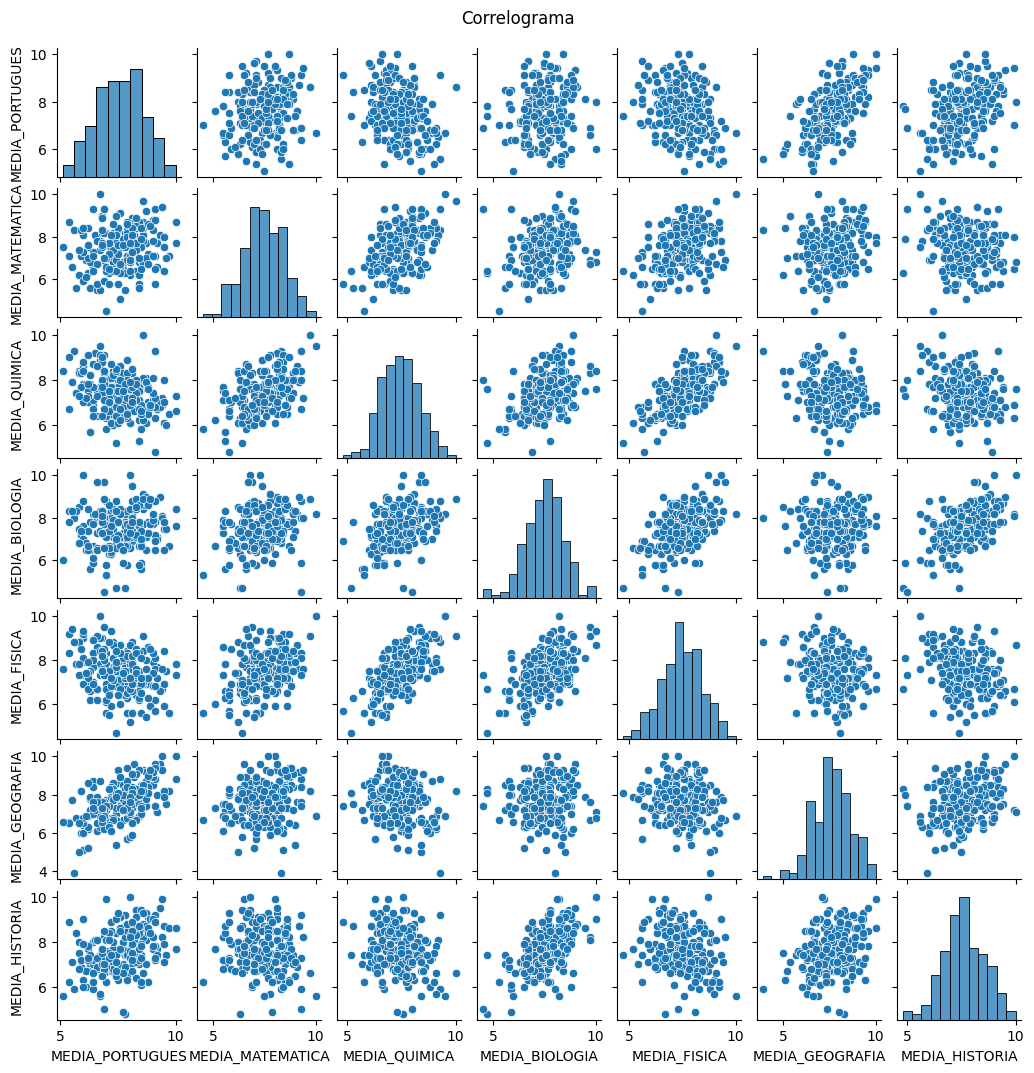

In [7]:
# Correlograma (apenas gráficos de dispersão)
correlograma = sns.pairplot(dados_pre_vestibular.drop(columns = ['ALUNO']), height = 1.5)
correlograma.fig.suptitle("Correlograma", y = 1.02)
plt.show()

In [8]:
# Matriz de correlações
dados_pre_vestibular.drop(columns = ['ALUNO']).corr()

,MEDIA_PORTUGUES,MEDIA_MATEMATICA,MEDIA_QUIMICA,MEDIA_BIOLOGIA,MEDIA_FISICA,MEDIA_GEOGRAFIA,MEDIA_HISTORIA
MEDIA_PORTUGUES,1.000000,0.155060,-0.315112,0.100238,-0.282595,0.592658,0.385540
MEDIA_MATEMATICA,0.155060,1.000000,0.492824,0.250311,0.405768,0.175195,-0.137465
MEDIA_QUIMICA,-0.315112,0.492824,1.000000,0.411225,0.683395,-0.208881,-0.234284
MEDIA_BIOLOGIA,0.100238,0.250311,0.411225,1.000000,0.518281,0.013473,0.565787
MEDIA_FISICA,-0.282595,0.405768,0.683395,0.518281,1.000000,-0.168895,-0.272502
MEDIA_GEOGRAFIA,0.592658,0.175195,-0.208881,0.013473,-0.168895,1.000000,0.290116
MEDIA_HISTORIA,0.385540,-0.137465,-0.234284,0.565787,-0.272502,0.290116,1.000000


### Padronização da base

In [9]:
# Padronização pelo método z-score, excluindo primeira coluna (ID do aluno)
medias  = np.mean(dados_pre_vestibular.drop(columns = ['ALUNO']), axis = 0)
desvios = np.std(dados_pre_vestibular.drop(columns = ['ALUNO']), axis = 0)
dados_pre_vestibular_padronizada = (dados_pre_vestibular.drop(columns = ['ALUNO']) - medias) / desvios

In [16]:
dados_pre_vestibular_padronizada.head()

,MEDIA_PORTUGUES,MEDIA_MATEMATICA,MEDIA_QUIMICA,MEDIA_BIOLOGIA,MEDIA_FISICA,MEDIA_GEOGRAFIA,MEDIA_HISTORIA
0,-0.297527,0.762201,1.014374,0.708887,1.406085,0.850337,0.409924
1,-1.269839,-0.673979,0.443539,-1.104669,-1.358241,0.161805,-0.613606
2,2.327715,1.275123,-0.127296,0.922247,0.342883,1.145422,0.102865
3,0.188629,0.454448,0.329372,-0.677950,-0.295039,0.751975,-0.204194
4,-1.561533,0.967370,0.443539,0.068808,1.618725,-2.493960,-1.330078


### Análise de componentes principais

In [10]:
# Obtenção dos componentes
pca = PCA()
componentes = pca.fit_transform(dados_pre_vestibular_padronizada)

In [11]:
# Verificação dos coeficientes
coeficientes = pd.DataFrame(pca.components_, columns = dados_pre_vestibular_padronizada.columns)
display(coeficientes)

,MEDIA_PORTUGUES,MEDIA_MATEMATICA,MEDIA_QUIMICA,MEDIA_BIOLOGIA,MEDIA_FISICA,MEDIA_GEOGRAFIA,MEDIA_HISTORIA
0,-0.320215,0.319906,0.549129,0.269683,0.544302,-0.261484,-0.237091
1,0.456814,0.311665,0.109316,0.508985,0.133438,0.421452,0.477224
2,-0.289421,-0.511947,-0.062369,0.454857,-0.009754,-0.421417,0.515436
3,-0.136077,-0.589912,-0.014235,0.030529,0.477727,0.608321,-0.184591
4,0.659039,-0.179799,-0.294032,0.126616,0.385539,-0.435331,-0.304467
5,0.382999,-0.396673,0.768663,-0.118091,-0.296067,-0.051501,-0.029419
6,-0.074037,-0.027608,-0.071529,0.656050,-0.470441,0.119131,-0.568095


In [12]:
# Variabilidade retida (explicada) pelos componentes
display(pd.DataFrame(pca.explained_variance_ratio_, columns = ['Var. Retida']))

,Var. Retida
0,0.364403
1,0.287010
2,0.173664
3,0.068918
4,0.054661
5,0.040747
6,0.010597


In [13]:
# Salvando os scores dos componentes na base de dados original
dados_pre_vestibular_pca = pd.DataFrame(componentes, columns = [f'Comp_{i+1}' for i in range(componentes.shape[1])])
dados_pre_vestibular = pd.concat([dados_pre_vestibular, dados_pre_vestibular_pca], axis = 1)

### Visualização da base de dados

In [17]:
# Ordenando do menor para o maior score no componente 1 (ordem ascendente)
dados_pre_vestibular.sort_values(by = 'Comp_1')

,ALUNO,MEDIA_PORTUGUES,MEDIA_MATEMATICA,MEDIA_QUIMICA,MEDIA_BIOLOGIA,MEDIA_FISICA,MEDIA_GEOGRAFIA,MEDIA_HISTORIA,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6,Comp_7
148,149,7.4,6.4,5.2,4.7,4.7,8.1,7.4,-4.163354,-2.544013,-0.874335,-0.484623,-0.852915,-0.373330,-0.199464
182,183,9.1,5.8,4.8,6.9,5.7,7.4,8.9,-4.112649,-0.251750,1.129524,-0.462632,1.020733,-0.448768,-0.186856
16,17,8.5,6.6,5.8,5.6,5.6,8.5,7.4,-3.387168,-1.134416,-1.070063,-0.035163,-0.067143,0.064511,-0.106711
76,77,9.7,7.1,6.5,6.7,5.6,8.2,8.6,-3.055430,0.704867,-0.428988,-0.878291,0.277685,0.762701,-0.227467
26,27,8.0,6.2,6.1,6.6,5.2,7.9,7.7,-3.036951,-1.062902,0.155715,-0.318114,-0.279926,0.325645,0.571309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,139,8.6,9.7,10.0,8.9,9.1,8.2,6.6,3.478273,2.198575,-1.758012,-0.135797,0.273446,1.047867,0.444301
151,152,5.4,8.7,9.0,7.8,9.2,6.5,6.2,3.795204,-1.150484,-0.302283,-0.017662,-0.511953,-0.409171,-0.001855
116,117,6.0,8.4,8.8,8.8,9.2,6.0,6.0,3.849389,-0.766841,0.287650,-0.141072,0.406492,-0.333798,0.737358
77,78,5.6,8.3,9.3,8.0,8.8,3.9,5.9,4.357322,-2.324608,0.850805,-1.502634,0.659135,0.332803,0.180395


In [18]:
# Ordenando do maior para o menor score no componente 1 (ordem descendente)
dados_pre_vestibular.sort_values(by = 'Comp_1', ascending = False)

,ALUNO,MEDIA_PORTUGUES,MEDIA_MATEMATICA,MEDIA_QUIMICA,MEDIA_BIOLOGIA,MEDIA_FISICA,MEDIA_GEOGRAFIA,MEDIA_HISTORIA,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6,Comp_7
66,67,6.7,10.0,9.5,8.2,10.0,6.9,5.6,4.751301,0.108406,-1.682989,-0.212427,0.311107,-0.319690,0.102473
77,78,5.6,8.3,9.3,8.0,8.8,3.9,5.9,4.357322,-2.324608,0.850805,-1.502634,0.659135,0.332803,0.180395
116,117,6.0,8.4,8.8,8.8,9.2,6.0,6.0,3.849389,-0.766841,0.287650,-0.141072,0.406492,-0.333798,0.737358
151,152,5.4,8.7,9.0,7.8,9.2,6.5,6.2,3.795204,-1.150484,-0.302283,-0.017662,-0.511953,-0.409171,-0.001855
138,139,8.6,9.7,10.0,8.9,9.1,8.2,6.6,3.478273,2.198575,-1.758012,-0.135797,0.273446,1.047867,0.444301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,27,8.0,6.2,6.1,6.6,5.2,7.9,7.7,-3.036951,-1.062902,0.155715,-0.318114,-0.279926,0.325645,0.571309
76,77,9.7,7.1,6.5,6.7,5.6,8.2,8.6,-3.055430,0.704867,-0.428988,-0.878291,0.277685,0.762701,-0.227467
16,17,8.5,6.6,5.8,5.6,5.6,8.5,7.4,-3.387168,-1.134416,-1.070063,-0.035163,-0.067143,0.064511,-0.106711
182,183,9.1,5.8,4.8,6.9,5.7,7.4,8.9,-4.112649,-0.251750,1.129524,-0.462632,1.020733,-0.448768,-0.186856
